In [1]:
import numpy as np
import pandas as pd

In [2]:
data_train = pd.read_csv('engineered_data_train.csv')
data_test = pd.read_csv('engineered_data_test.csv')

X_train = data_train.drop('Y', axis=1)
y_train = data_train['Y']

X_test = data_test.drop('Y', axis=1)
y_test = data_test['Y']

In [3]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

Replace with CV：

In [20]:
from sklearn.model_selection import train_test_split
X_train_valid, X_test_valid, y_train_valid, y_test_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=49)

In [6]:
lr=LogisticRegression().fit(X_train, y_train)

C:\Users\baoji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
maxAuc=0
sol=""
for st in solver:
    lr=LogisticRegression(solver=st).fit(X_train_valid, y_train_valid)
    lr_probs = lr.predict_proba(X_test_valid)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test_valid, lr_probs)
    auc = metrics.auc(fpr, tpr)
    if maxAuc<auc:
        maxAuc=auc
        sol=st

C:\Users\baoji\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\baoji\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\baoji\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\baoji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\baoji\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coe

In [16]:
print(maxAuc)
print(sol)

0.9926826941423395
newton-cg


In [53]:
C_value=[0.01, 0.1, 1, 10, 100]
maxAuc=0
sol=0
for st in C_value:
    lr=LogisticRegression(solver='liblinear',max_iter=1000, C=st).fit(X_train_valid, y_train_valid)
    lr_probs = lr.predict_proba(X_test_valid)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test_valid, lr_probs)
    auc = metrics.auc(fpr, tpr)
    if maxAuc<auc:
        maxAuc=auc
        sol=st

In [54]:
print(maxAuc)
print(sol)

0.9524686688561441
0.1


In [36]:
lr=LogisticRegression(solver='lbfgs',max_iter=1000, C=0.1).fit(X_train_valid, y_train_valid)

In [22]:
lr.score(X_test,y_test)

0.7091909155429382

In [41]:
from sklearn.metrics import confusion_matrix
p=lr.predict(X_test)
confusion_matrix(y_test,p)

array([[8633, 1078],
       [5478, 7355]], dtype=int64)

In [42]:
pred_y=lr.predict(X_test_valid) 

In [43]:
probs_y=lr.predict_proba(X_test_valid) 

(0, 1)

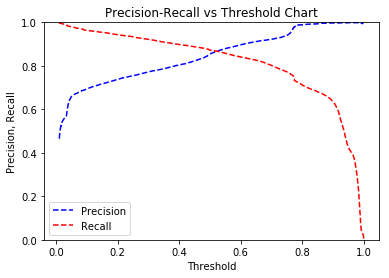

In [44]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test_valid, probs_y[:, 1]) 
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

We pick thrshold of 0.3 (宁杀错，不放过）

In [37]:
lr_probs = lr.predict_proba(X_test_valid)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_valid, lr_probs)
auc = metrics.auc(fpr, tpr)

In [38]:
auc

0.9485906756435661

In [39]:
lr_probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, lr_probs)
auc = metrics.auc(fpr, tpr)

In [40]:
auc

0.863611910272487